<a href="https://colab.research.google.com/github/stutigarg1/FMML-Projects-and-Assignments/blob/main/Module_9(B)_Project_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 9 Project (b): Convolutional Neural Networks Project

## Module coordinator: Kushagra Agarwal



<img src="https://hub.packtpub.com/wp-content/uploads/2018/04/iStock-851960058-696x464.jpg" width=850px/>

In this project, you will understand how you can perform emotion recognition using CNNs in a step-by-step manner. To make your task easier, we provide you the starter code for the project. It is expected that you should try to understand the project statement properly and perform the tasks in sequence. We will be using Pytorch framework for the implementation. You need to fill in the missing code parts to achieve a particular task. At the end, you will have a basic implementation ready for an emotion detection application.

Basic steps involved in Emotion Recognition:
- Face detection
- Building classifier
- Classifying emotions

We will use a popular FER2013 dataset for this project.

## Task 1: Explore the dataset
The dataset contains 48 x 48 grayscale facial images of faces.The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image. The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).

<img src="https://www.researchgate.net/profile/Chaudhary-Aqdus/publication/349055345/figure/fig3/AS:987834383085568@1612529478973/FER-2013-sample-images-for-facial-emotion-recognition.jpg" width=650px/>

Import libraries

In [1]:
# We have imported the necessary packages here. Feel free to import anything more you need!
import torch
import torchvision
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dlib
import cv2
from PIL import Image

### Download and load dataset

In [2]:
!gdown https://drive.google.com/uc?id=1YrNrok2Z1udWWIpejXIdLk7duUq87s0N
!unzip fer2013.csv.zip

Downloading...
From (original): https://drive.google.com/uc?id=1YrNrok2Z1udWWIpejXIdLk7duUq87s0N
From (redirected): https://drive.google.com/uc?id=1YrNrok2Z1udWWIpejXIdLk7duUq87s0N&confirm=t&uuid=bf1cf326-5f5e-4000-8413-b5774ec22bb7
To: /content/fer2013.csv.zip
100% 101M/101M [00:00<00:00, 144MB/s] 
Archive:  fer2013.csv.zip
  inflating: fer2013.csv             


In [3]:
# Load the dataset csv using pandas package. It displays the data in tabular form
emotion_data = pd.read_csv('./fer2013.csv')
print(emotion_data)

       emotion                                             pixels        Usage
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...     Training
1            0  151 150 147 155 148 133 111 140 170 174 182 15...     Training
2            2  231 212 156 164 174 138 161 173 182 200 106 38...     Training
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...     Training
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...     Training
...        ...                                                ...          ...
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  PrivateTest
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  PrivateTest
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest
35886        2  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...  PrivateTest

[35887 rows x 3 columns]


In [4]:
# Class dictionary for dataset
classes = {0:"Angry", 1:"Disgust", 2:"Fear", 3:"Happy", 4:"Sad", 5:"Surprise", 6:"Neutral"}

### Visualize a few images from dataset

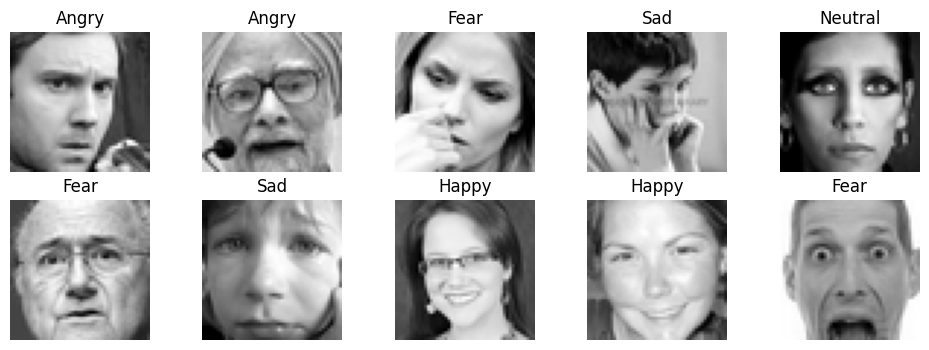

In [5]:
fig = plt.figure(figsize=(12,4))
for i in range(10):
  ax = plt.subplot(2,5,i+1)
  # This is how we access ith row in 'pixels' column in the dataset table
  img = emotion_data.iloc[i]['pixels'].split(' ') # Converting into array of ints
  img = np.array(img).astype(int)

  # Labels for our dataset
  label = int(emotion_data.iloc[i]['emotion'])
  ax.imshow(img.reshape((48,48)), cmap='gray')
  ax.set_title(classes[label])
  ax.set_axis_off()
plt.show()

In [6]:
names, counts = np.unique(emotion_data['Usage'].to_numpy(), return_counts=True)
print('Number of samples in {} = {}'.format(names[0], counts[0])) #testset
print('Number of samples in {} = {}'.format(names[1], counts[1])) #valset
print('Number of samples in {} = {}'.format(names[2], counts[2])) #trainset

Number of samples in PrivateTest = 3589
Number of samples in PublicTest = 3589
Number of samples in Training = 28709


### Distribution of class labels

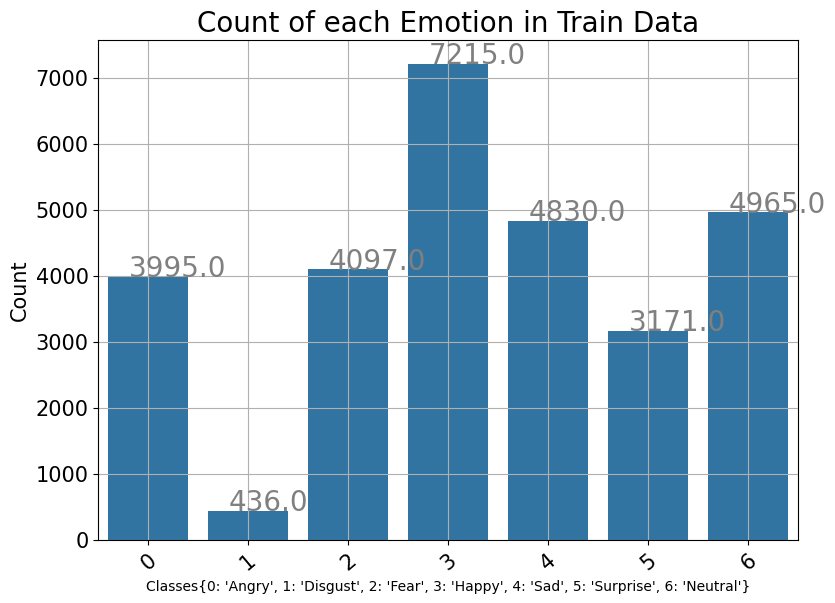

In [7]:
# Plot bar chart showing number of samples per class in the train set
temp_train = emotion_data.loc[emotion_data['Usage'] == 'Training']
df_temp_train = temp_train.sort_values(by = "emotion", inplace = False)
fig = plt.figure(figsize = (7, 5))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Train Data", fontsize = 20)
sns.countplot(x = "emotion", data = df_temp_train)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+1.5, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("Classes"+ str(classes))
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

### Task: Similarly, write the code below to plot the charts for remaining two sets also. --> Completed below

**Task: Similarly, write the code below to plot the charts for remaining two sets also**
- Test set and Validation set

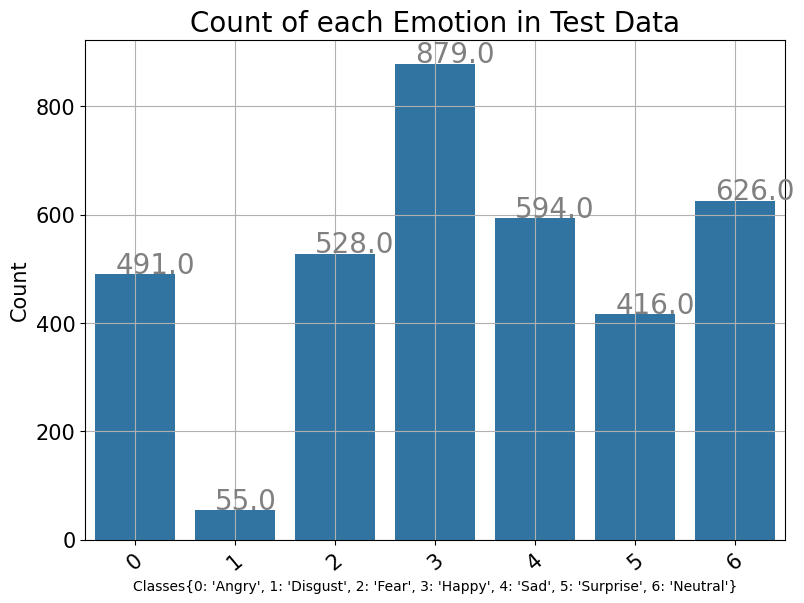

In [8]:
# Plot bar chart showing number of samples per class in the Test set
temp_train = emotion_data.loc[emotion_data['Usage'] == 'PrivateTest']
df_temp_train = temp_train.sort_values(by = "emotion", inplace = False)
fig = plt.figure(figsize = (7, 5))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Test Data", fontsize = 20)
sns.countplot(x = "emotion", data = df_temp_train)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+1.5, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("Classes"+ str(classes))
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

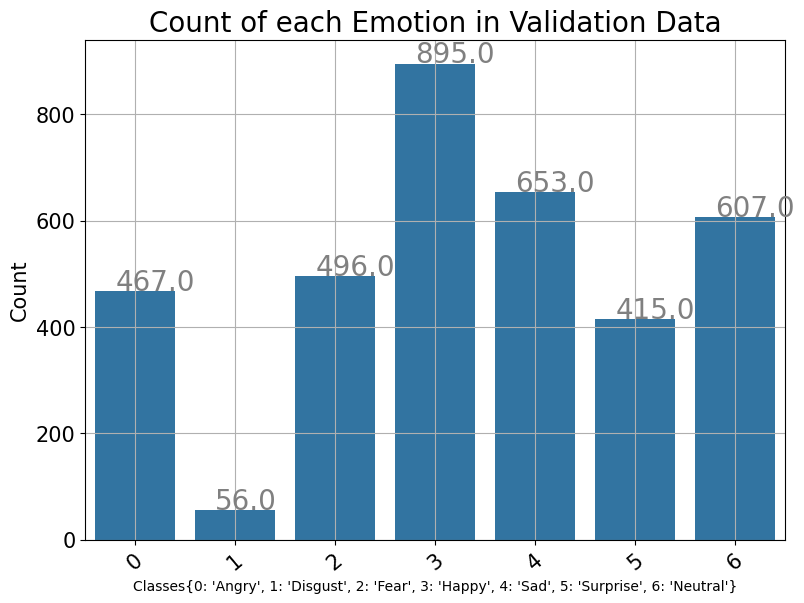

In [9]:
# Plot bar chart showing number of samples per class in the validation set
temp_train = emotion_data.loc[emotion_data['Usage'] == 'PublicTest']
df_temp_train = temp_train.sort_values(by = "emotion", inplace = False)
fig = plt.figure(figsize = (7, 5))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Validation Data", fontsize = 20)
sns.countplot(x = "emotion", data = df_temp_train)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+1.5, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("Classes"+ str(classes))
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

Note the imbalance in the data through above graphs.

Face detection: Many applications involving facial images as input data require face detection in the pipeline at this step. Here, we localise the face in the given image removing the irrelevant parts, making the face centered and occupying most of the part in the image. As mentioned earlier, our dataset already has more or less centered faces, so we will skip this step for now but when using some other dataset or using your own images (eg. from webcam) as you will do later, you can do this step to get a proper cropped face from the image.

## Task 2: Data preprocessing

### Creating train, validation and test sets

In [10]:
X_train, y_train = [], []
X_val, y_val = [], []
X_test, y_test = [], []

for index, row in emotion_data.iterrows():
  k = row['pixels'].split(" ")

  if row['Usage'] == 'Training':
    X_train.append(np.array(k))
    y_train.append(row['emotion'])

  # Similarly write the conditions for test and val splits here
  ###### YOUR CODE HERE  ###### ---> Completed below
  elif row['Usage'] == 'PrivateTest':
    X_test.append(np.array(k))
    y_test.append(row['emotion'])

  elif row['Usage'] == 'PublicTest':
    X_val.append(np.array(k))
    y_val.append(row['emotion'])



X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

print('Training set shape: ', X_train.shape, y_train.shape)
print('Validation set shape: ', X_val.shape, y_val.shape)
print('Testing set shape: ', X_test.shape, y_test.shape)

Training set shape:  (28709, 2304) (28709,)
Validation set shape:  (3589, 2304) (3589,)
Testing set shape:  (3589, 2304) (3589,)


In [11]:
# To get data between 0 and 1
X_train = X_train.astype(float) / 255.
X_test = X_test.astype(float) / 255.
X_val = X_val.astype(float) / 255.

We will define a dataset wrapper over Pytorch Dataset class which takes in the numpy arrays we created and returns a sample with required preprocessing.

In [12]:
class Fer2013Dataset(Dataset):
  def __init__(self, x, y, transforms=None):
    self.x = x.reshape((-1, 48, 48))
    self.y = y
    self.transforms= transforms

  def __getitem__(self, index):
    img, y = self.x[index], self.y[index]

    if self.transforms is not None:
        img = self.transforms(img)
    return img, y

  def __len__(self):
    return len(self.y)

In [13]:
batch_size=32

transform = transforms.ToTensor()

# Create tensor dataset from above tensors
train_dataset = Fer2013Dataset(X_train, y_train, transforms=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, num_workers=2)

val_dataset = Fer2013Dataset(X_val, y_val, transforms=transform)
val_loader = DataLoader(val_dataset, batch_size=batch_size, num_workers=2)

test_dataset = Fer2013Dataset(X_test, y_test, transforms=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=2)

## Task 3: Building a CNN model

In [14]:
# Define your CNN architecture here
# To start with, let's say you can create a model with 4 relu-activated convs,
# each followed by a pooling layer. Then, you can add 2-3 fully connected layers

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        #### YOUR CODE HERE  ###
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.pool1 = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool2 = nn.MaxPool2d(2, 2)

        self.conv3 = nn.Conv2d(64, 128, 3)
        self.pool3 = nn.MaxPool2d(2, 2)

        self.conv4 = nn.Conv2d(128, 256, 3)
        self.pool4 = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(256, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 7)


    def forward(self,x):
        #### YOUR CODE HERE  ####
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.pool4(F.relu(self.conv4(x)))
        x = torch.flatten(x, 1)  # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [15]:
# Device (CPU/GPU)
device = 'cpu' #torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Initialize the CNN
model = Net().to(device)
print(model)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=256, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=7, bias=True)
)


### Training/Testing functions

In [16]:
def train(model, train_loader, loss_func, optimizer, num_epochs):

  # Training mode
  model.train()

  train_losses = []
  train_acc = []

  # Train the model
  for epoch in range(num_epochs):
    running_loss = 0
    running_acc = 0
    for i, (images, labels) in enumerate(train_loader):
      # Convert input data to float32 and move to device
      images = images.float().to(device)
      labels = labels.to(device)

      # clear gradients for this training step
      optimizer.zero_grad()

      # Forward pass
      output = model(images)

      # Calculate loss
      loss = loss_func(output, labels)

      # Backpropagation, compute gradients
      loss.backward()

      # Apply gradients
      optimizer.step()

      # Running loss
      running_loss += loss.item()

      # indices of max probabilities
      _, preds = torch.max(output, dim=1)

      # Calculate number of correct predictions
      correct = (preds.float() == labels).sum()
      running_acc += correct

      # Average loss and acc values
      epoch_loss = running_loss / len(train_loader.dataset)
      epoch_acc = running_acc / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_acc.append(epoch_acc)
    print ('Epoch {}/{}, Loss: {:.4f}, Accuracy: {:.4f}'.format(epoch + 1, num_epochs, epoch_loss, epoch_acc*100))

  return train_losses, train_acc

In [30]:
def test_model(model, testloader):
  correct = 0
  total = 0
  true_labels = []
  predicted_labels = []

  model.eval()
  # Deactivate autograd engine (don't compute grads since we're not training)
  with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.float().to(device)
        labels = labels.to(device)
        # Calculate outputs by running images through the network
        outputs = model(images)
        # The class with the highest value is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

  print('Accuracy of the network: %d %%' % (100 * correct / total))
  return true_labels, predicted_labels

## Task 4: Training & Evaluation

### Train the model

In [18]:
# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer with learning rate # Pick an optimizer you think is suitable
# I think Adam's Optimizer with lr= 0.001 is suitable since it is widely used.
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

history = train(model, train_loader, criterion, optimizer, num_epochs=5)
#train_losses, train_acc = train(model, train_loader, criterion, optimizer, num_epochs=1)

Epoch 1/5, Loss: 0.0550, Accuracy: 27.5802
Epoch 2/5, Loss: 0.0470, Accuracy: 41.0394
Epoch 3/5, Loss: 0.0421, Accuracy: 48.1138
Epoch 4/5, Loss: 0.0389, Accuracy: 52.5375
Epoch 5/5, Loss: 0.0364, Accuracy: 55.7839


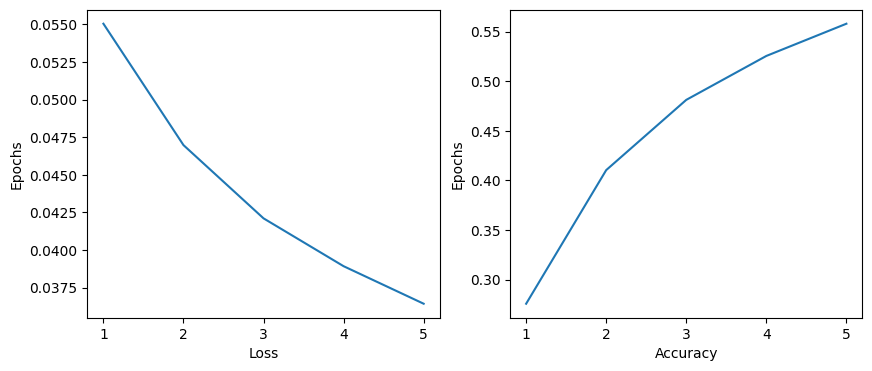

In [19]:
# You can fine-tune your model looking at below plots
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(history[0])+1),history[0])
plt.xlabel('Loss')
plt.ylabel('Epochs')

ax = fig.add_subplot(1,2, 2)
ax.plot(np.arange(1,len(history[1])+1),history[1])
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.show()

### Evaluate your model

In [20]:
# Visualize top K predictions
def visualize_prediction(image, model, k=3):
  model.eval()

  preds = model(image.unsqueeze(1).float())

  topk = torch.topk(preds, k, dim=1)
  topk = topk.indices.numpy()
  print('Top {} Predictions'.format(k))
  for i in range(3):
    print('{}) {}'.format(i+1, classes[topk[0][i]]))

  plt.imshow(image[0].numpy(), cmap='gray')
  plt.show()

Top 3 Predictions
1) Angry
2) Fear
3) Sad


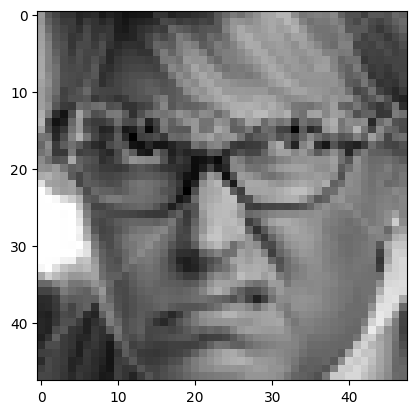


True label:  Angry


In [33]:
image, label = test_dataset[0]
#visualize_prediction(image, cnn) # cnn is not defined
visualize_prediction(image, model)
print('\nTrue label: ', classes[int(label)])

In [31]:
# Print accuracy on test data
true_labels, predicted_labels = test_model(model, test_loader)

Accuracy of the network: 51 %


---

# BONUS TASK

### How can you improve the performance of your model given that the number of datapoints is fixed?

##### Hint: A very simple fix (discussed in Lab 2) is to use a pretrained CNN model. The pretrained model could be trained on any dataset (eg Imagenet) and the first few layers of the same can be directly used for this task.

### You are encouraged to try out different pretrained models like ResNet/VGG/AlexNet and see how the performance improves. Do all the models result in similar accuracy?

**Q) How can you improve the performance of your model given that the number of datapoints is fixed?**
- When we work with a fixed dataset size it implies that we can't get more data to improve CNN's performance. This limits our model's ability to generalize well, especially on small datasets like FER2013

- Therefore, we can use Transfer Learning to improve the performance of our model given that the number of datapoints are fixed.

- Transfer Learning helps in borrowing "knowledge" from big, pre-trained models that were trained on massive datasets like ImageNet.

- Instead of training a deep CNN from scratch (which needs lots of data), we reuse the early layers of a pre-trained model.

- We reuse those layers since early layers detect generic features like edges, textures, and patterns. These features are useful in image classification and facial expression recognition.

**ResNet 50**

In [34]:
import torchvision.models as models
import torch.nn as nn

# Load pretrained ResNet18
model = models.resnet18(pretrained=True)

# Modify the first conv layer to accept 1 channel instead of 3
# Copy the original weights and average them across the RGB channels
orig_weights = model.conv1.weight.data
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
model.conv1.weight.data = orig_weights.mean(dim=1, keepdim=True)

# Update the final fully connected layer to match the number of classes
num_classes = 7
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move model to device
model = model.to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 142MB/s]


In [37]:
from torchvision import models, transforms
import torch.nn as nn

# Load pretrained ResNet-50
resnet50 = models.resnet50(pretrained=True)

# Modify the first conv layer to accept 1-channel (grayscale) images
resnet50.conv1 = nn.Conv2d(
    1, 64, kernel_size=7, stride=2, padding=3, bias=False
)

# Replace the final fully connected layer to match 7 emotion classes
resnet50.fc = nn.Linear(resnet50.fc.in_features, 7)

# Move to device
resnet50 = resnet50.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 139MB/s]


In [39]:
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5]),  # Since grayscale; or use 3x for RGB
    transforms.Grayscale(num_output_channels=3)
])

In [41]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet50.parameters(), lr=0.001)

In [42]:
# Train
history = train(resnet50, train_loader, criterion, optimizer, num_epochs=1)

Epoch 1/1, Loss: 0.0480, Accuracy: 40.5866


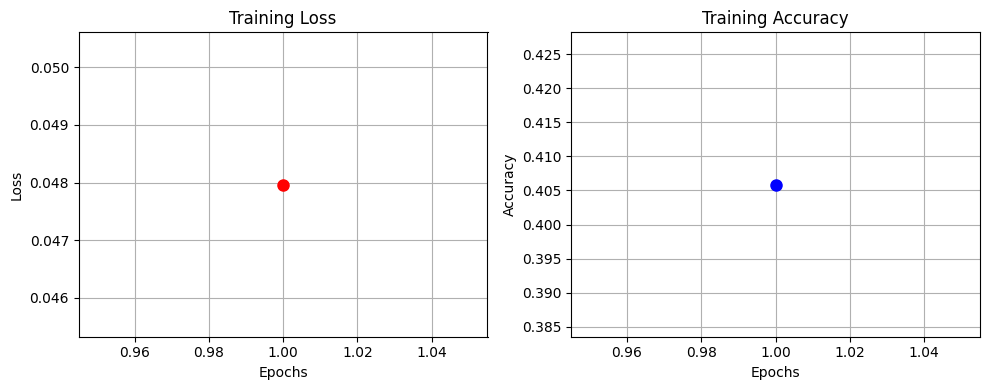

In [46]:
fig = plt.figure(figsize=(10,4))

# Plotting training loss
ax = fig.add_subplot(1, 2, 1)
ax.plot(np.arange(1, len(history[0]) + 1), history[0], marker='o', markersize=8, color='red')
ax.set_title("Training Loss")
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.grid(True)

# Plotting training accuracy
ax = fig.add_subplot(1, 2, 2)
ax.plot(np.arange(1, len(history[1]) + 1), history[1], marker='o', markersize=8, color='blue')
ax.set_title("Training Accuracy")
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.grid(True)

plt.tight_layout()
plt.show()

**Note:**
- Here, it was only trained on 1 epoch. As a result, it would display a point in the graph.

In [47]:
# Visualize top K predictions
def visualize_prediction(image, model, k=3):
  model.eval()

  preds = model(image.unsqueeze(1).float())

  topk = torch.topk(preds, k, dim=1)
  topk = topk.indices.numpy()
  print('Top {} Predictions'.format(k))
  for i in range(3):
    print('{}) {}'.format(i+1, classes[topk[0][i]]))

  plt.imshow(image[0].numpy(), cmap='gray')
  plt.show()

Top 3 Predictions
1) Angry
2) Neutral
3) Sad


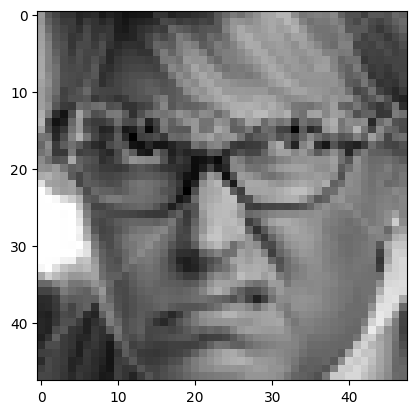


True label:  Angry


In [49]:
image, label = test_dataset[0]
visualize_prediction(image, model)
print('\nTrue label: ', classes[int(label)])

In [50]:
# Print accuracy on test data
true_labels, predicted_labels = test_model(model, test_loader)

Accuracy of the network: 40 %


**Observations:**
- CNN-
Top 3 Predictions: Angry, Fear, Sad

- ResNet50: Top 3 Predictions: Angry, Neutral, Sad
- True label in both the cases was 'Angry'.
- There is an overlap in the top 3 predictions for both the models models, with 2 out of 3 labels matching (Angry and Sad).
- This indicates a 66% similarity in predictions.


**Q) Do all the models result in similar accuracy?**
- No, all the models don't result in similar accuracy. Architectures like- ResNet50 have higher accuracy rates compared to simple CNN's.
- In my experiment, the simple CNN reached an accuracy of 51% after 5 epochs and ResNet50 achieved 40% accuracy in just 1 epoch.
- When comparing accuracy after the first epoch, ResNet50 achieved 40%, which is commendable compared to the simple CNN that reached only 27.58%.
- This also shows how ResNet50 outperforms a simpler CNN.
- Also, the difference in epochs used played a major role since, ResNet50 was only trained for 1 epoch because running it for 5 epochs initially, took several hours. Then I realized, that since ResNet50 is a heavier architecture, executing a single epoch takes over 30 minutes to execute (using CPU).
- It would definitely work better and faster if we use the GPU.
- In conclusion, all models don't result in similar accuracy due to their difference in architectures and training resources(LIke CPU, GPU).